## Introduction

**The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.**

In [344]:
# Import required librarie`s
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Data Gathering

- **Twitter archive file**: download this file manually by clicking the following link: twitter_archive_enhanced.csv

- **The tweet image predictions**: WeRateDogs Twitter archive was ran through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 3 since tweets can have up to three images).i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network, This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON**: Each tweet's retweet count and favorite ("like") count at the minimum and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

- Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [345]:
# Reading CSV file
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [346]:
# Make directory if it doesn't already exist & define and get url
folder_name = 'image_predictions_file'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'    
response = requests.get(url)

In [347]:
# Access and write content to file
with open(os.path.join(folder_name,
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [348]:
# Reading TSV file
image_predictions = pd.read_csv('image_predictions_file/image-predictions.tsv', sep = '\t')

#### The code template below was provided by udacity

```
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
```

In [349]:
# Opening the json file and append to a new list
df_list = []

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [350]:
# Reading the json file line by line into a pandas DataFrame
tweet_data = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])

## Assessing Data

In the cells below, each column of each table in this WeRateDogs dataset is described. To see the table that goes hand in hand with these descriptions, do visual assessment in pandas.

### Visual assessment
Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [351]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


`twitter_archive_enhanced` columns: 

In [352]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


`image_predictions` columns: 

In [353]:
tweet_data

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


`tweet_data` columns: 

### Programmatic assessment
Pandas' functions and/or methods are used to assess the data.

In [354]:
twitter_archive_enhanced.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1677,682059653698686977,NaN,NaN,2015-12-30 04:44:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tess. Her main passions are shelves an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682059653...,11,10,Tess,None,None,None,None
2153,669661792646373376,NaN,NaN,2015-11-25 23:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a brave dog. Excellent free climber. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669661792...,5,10,a,None,None,None,None
1772,678278586130948096,NaN,NaN,2015-12-19 18:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another spooky pupper here. Most definitely fl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678278586...,10,10,None,None,None,pupper,None
1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chompsky. He lives up to his name. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None


In [355]:
# check information about column names, datatype, missing data
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [356]:
# check if any null values
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [357]:
# check if any duplicate records
twitter_archive_enhanced.duplicated().sum()

0

In [358]:
# Check the number of unique values in each column.
twitter_archive_enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [359]:
# Describe
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [360]:
# Value_count
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [361]:
twitter_archive_enhanced.text.value_counts().sample(4)

Say hello to Cupcake. She's an Icelandic Dippen Dot. Confused by the oddly geometric lawn pattern. 11/10 https://t.co/D7rorf4YKL                                       1
This is Penny. She's both pupset and fired pup. Not pleased w your barbaric attempts at cleanliness. 12/10 would enjoy more shampoo options https://t.co/OYdDlfOGXP    1
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                           1
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                           1
Name: text, dtype: int64

In [362]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [363]:
twitter_archive_enhanced.name.sample(30)

1236        Kane
2346         the
1183        Otis
515        Craig
2197     Banditt
959      Gilbert
968         None
1216     Calbert
1626    Theodore
126       Cooper
1363        Chip
1418     Jessiga
283         None
1546     Chipson
1254        None
1155        Fred
903         Odie
415      Paisley
1514        None
520          Gus
1398      Fillup
1268       Cecil
531         None
1420    Franklin
544        Major
1806        None
195         None
2342        None
849        Angel
464      Strudel
Name: name, dtype: object

In [364]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [365]:
# loc
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 75, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 420, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 0, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 80, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 1776, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 144, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 26, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 20, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 121, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 143, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 44, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 60, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 45, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 50, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 99, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 204, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 165, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 666, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 27, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 182, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 24, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 960, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 84, 'text'])
print(twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator == 88, 'text'])

340    RT @dog_rates: This is Logan, the Chow who liv...
695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object
188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object
1254    Here's a brigade of puppers. All look very pre...
Name: text, dtype: object
979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dty

In [366]:
print(twitter_archive_enhanced['text'][340])
print(twitter_archive_enhanced['text'][695])
print(twitter_archive_enhanced['text'][188])
print(twitter_archive_enhanced['text'][2074])
print(twitter_archive_enhanced['text'][315])
print(twitter_archive_enhanced['text'][1016])
print(twitter_archive_enhanced['text'][1254])
print(twitter_archive_enhanced['text'][979])
print(twitter_archive_enhanced['text'][1779])
print(twitter_archive_enhanced['text'][1712])
print(twitter_archive_enhanced['text'][1433])
print(twitter_archive_enhanced['text'][1228])

RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Here we have uncovered an entire battalion of holiday puppers. Avera

In [367]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [368]:
twitter_archive_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [369]:
twitter_archive_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [370]:
twitter_archive_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [371]:
twitter_archive_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [372]:
image_predictions.sample(12)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
620,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True
842,695051054296211456,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True
718,685667379192414208,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,sliding_door,0.344526,False,doormat,0.190027,False,washbasin,0.046326,False
400,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1,soft-coated_wheaten_terrier,0.340806,True,Sealyham_terrier,0.234898,True,kuvasz,0.203495,True
1752,824325613288833024,https://pbs.twimg.com/media/C3CXxaoWQAAiLuC.jpg,1,Pembroke,0.990793,True,Cardigan,0.008919,True,basenji,0.000262,True
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True
849,695629776980148225,https://pbs.twimg.com/media/Cadfl6zWcAEZqIW.jpg,1,Old_English_sheepdog,0.693857,True,otterhound,0.232117,True,West_Highland_white_terrier,0.012867,True
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True


In [373]:
# check information about column names, datatype, missing data
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [374]:
# check if any null values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [375]:
# check if any duplicate records
image_predictions.duplicated().sum()

0

In [376]:
image_predictions.jpg_url.duplicated().sum()

66

In [377]:
image_predictions[image_predictions['jpg_url'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [378]:
image_predictions.jpg_url.nunique()

2009

In [379]:
# Check the number of unique values in each column.
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [380]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [381]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [382]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [383]:
# duplicated
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [384]:
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [385]:
tweet_data.sample(12)

,id,retweet_count,favorite_count
1862,675362609739206656,262,1136
2233,668171859951755264,208,525
817,770655142660169732,2013,8130
1269,709409458133323776,788,2855
888,759566828574212096,24319,0
1347,704134088924532736,519,1653
466,817120970343411712,3011,13367
1756,678755239630127104,3741,7802
1705,680801747103793152,925,2600
1275,709042156699303936,1864,5197


In [386]:
# check information about column names, datatype, missing data
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [387]:
# check if any null values
tweet_data.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [388]:
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [389]:
tweet_data[tweet_data.id.duplicated()]

,id,retweet_count,favorite_count


In [390]:
tweet_data.index.duplicated().any()

False

### Quality
`twitter_archive_enhanced` **table**
<br>
<br>1. Erroneous data type: `tweet_id` should be a string to integer datatype, `timestamp` should be in datetime not string datatype.
<br>2. You only want original ratings (no retweets) that have images
<br>3. Columns not needed: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.
<br>4. Extractions possible: Gender(M or F) of dogs could be extracted from `text`,(phone, vine, tweet_deck) could be extracted from source.
<br>5. Missing values: the `expanded_urls` is 2297 instead of 2356.
<br>6. invalid data entry: all `rating_numerator` should be => 10, all `rating_denominator` should be = 10.
<br>7. Lowercase: all values in `name` column should be in lowercase
<br>8. inaccurate values: values like a,an,by,none,just,his,old,the,actually etc are seen in the `name` column.
<br>9. Column name/value change: should be `floof` instead of `floofer`.
<br>10. None & Null values should be represented as Nan in all column especially `name`,  `floof`, `doggo`, `pupper`, `puppo` columns 
<br>
<br> `image_predictions` **table**
<br>
<br>11. Erroneous data type: `tweet_id` should be a string to integer datatype.
<br>12. Descriptive column names: `jpg_url` should be `image_url`,  `img_num` should be `image_number`,`p1` should be `prediction_1`& `p1_conf` should be `prediction_confidence_1`, `p2` should be `prediction_2` & `p2_conf` should be `prediction_confidence_2`, `p3` should be `prediction_3` & `p3_conf` should be `prediction_confidence_3`etc...
<br>13. Missing records: 2075 instead of 2356
<br>
<br> `tweet_data` **table**
<br>
<br>14. Descriptive column name: `id` should be `tweet_id`
<br>15. Erroneous data type: `tweet_id` should be a string to integer datatype.
<br>16. Missing records: 2354 instead of 2356.
<br>
### Tidiness
 `general` **table**
<br>
<br>1. All three dataframes can be combined into one single dataframe.
<br>
<br>`twitter_archive_enhanced` **table**
<br>
<br>2. `doggo`, `floof`, `pupper`, `puppo` should be in 1 column instead of 4 column.
<br>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 


In [391]:
# Make copies of original pieces of data
clean_twitter_archive_enhanced = twitter_archive_enhanced.copy()
clean_image_predictions = image_predictions.copy()
clean_tweet_data = tweet_data.copy()




### Issue #1:

#### Define:  You only want original ratings (no retweets) that have images

#### Code

In [392]:
# Filter clean_twitter_archive_enhanced to only have original tweets and remove all retweets then,
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced[clean_twitter_archive_enhanced['retweeted_status_id'].isnull()]

# filter clean_twitter_archive_enhanced to only have tweets having images in clean_image_predictions dataframe:
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced[clean_twitter_archive_enhanced['tweet_id'].isin(clean_image_predictions['tweet_id'].unique())]
# Filter clean_tweet_data to only have 'id' in clean_twitter_archive_enhanced 'tweet_id'
clean_tweet_data = clean_tweet_data[clean_tweet_data['id'].isin(clean_twitter_archive_enhanced['tweet_id'].unique())]

#### Test

In [393]:
# Check if all retweets as been removed:
clean_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

In [394]:
# check shape
clean_tweet_data.shape

(1994, 3)

In [395]:
clean_twitter_archive_enhanced.shape

(1994, 17)

### Missing Data

### Issue #2, 3, 4:`

- Missing expanded_urls is 2297 instead of 2356 in `clean_twitter_archive_enhanced` table.
- Missing records 2075 instead of 2356 in `clean_image_predictions` table.
- Missing records 2354 instead of 2356 in `clean_tweet_data` table.

#### Define: All this issues have been fixed after executing issue 1, since `clean_twitter_archive_enhanced`.shape is (1994,17) & `clean_tweet_data`.shape is (1994,3) respectively..

#### Code

In [396]:
# No programmatic cleaning code needed anymore

#### Test

In [397]:
# isnull
clean_twitter_archive_enhanced.expanded_urls.isnull().sum()

0

In [398]:
clean_tweet_data.shape

(1994, 3)

### Tidiness

- All three dataframes can be combined into one single dataframe.
- doggo, floof, pupper, puppo should be in 1 column instead of 4 column
- The image predictions could be condensed to show just the most confident dog breed prediction

### Issue #3, 4, 5, 6:

- All three dataframes can be combined into one single dataframe.

#### Define: Create a new dataframe by using the `merge` method  to merge the three tables based on a common column `tweet_id`, before that we have to do a column name change from id to tweet_id in the `clean_tweet_data` table and deal with the erroneous data type of the `tweet_id` column which would be  changed from integer datatype to string datatype in all the tables, alongside timestamp would be changed from string datatype to datetime datatype in the `clean_twitter_archive_enhanced` table.

#### Define: Use the `rename` method to change column name.

#### Code

In [399]:
# Rename column in clean_tweet_data table
clean_tweet_data.rename (columns={'id' : 'tweet_id'}, inplace= True)

#### Test

In [400]:
clean_tweet_data.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


#### Define: Use the `astype` method & `datetime` method to change datatypes in all tables

#### Code

In [401]:
# Convert tweet_id to string
clean_twitter_archive_enhanced['tweet_id'] = clean_twitter_archive_enhanced['tweet_id'].astype(str)
clean_image_predictions['tweet_id'] = clean_image_predictions['tweet_id'].astype(str)
clean_tweet_data['tweet_id'] = clean_tweet_data['tweet_id'].astype(str)

# Convert timestamp to datetime
clean_twitter_archive_enhanced['timestamp'] = pd.to_datetime(clean_twitter_archive_enhanced['timestamp'])

#### Test

In [402]:
clean_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   int64           

In [403]:
clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [404]:
 clean_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1994 non-null   object
 1   retweet_count   1994 non-null   int64 
 2   favorite_count  1994 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 62.3+ KB


#### Define: Use the `merge` method to merge the three tables on a common column `tweet_id`.

#### Code

In [405]:
# Create a new dataframe that merge clean_twitter_archive_enhanced and clean_image_predictions

df_we_rate_dogs = pd.merge(clean_twitter_archive_enhanced, 
                      clean_image_predictions,
                      how = 'left', on = ['tweet_id'])
# Create a new dataframe that merge new dataframe and clean_tweet_data
df_we_rate_dogs = pd.merge(df_we_rate_dogs, 
                      clean_tweet_data,
                      how = 'left', on = ['tweet_id'])

#### Test

In [406]:
df_we_rate_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [407]:
df_we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   int64           

### Issue #7:

#### Define: Condense the 4 dog stage column (`doggo`, `floofer`, `puppo`, `pupper`) into a single `dog_stage` column and convert it into a categorical variable. Also, remove the unwanted columns.

#### Code

In [408]:
# Create a function to find 'doggo', 'floofer', 'puppo', 'pupper' in text
def get_stage(row):
    if 'doggo' in row['text'].lower():
        dog_stage = 'doggo'
    elif 'floof' in row['text'].lower():
        dog_stage = 'floofer'
    elif 'pupper' in row['text'].lower():
        dog_stage = 'pupper'
    elif 'puppo' in row['text'].lower():
        dog_stage = 'puppo'
    else:
        dog_stage = ''
    return dog_stage

In [409]:
# Apply function to column and change datatype to category
df_we_rate_dogs['dog_stage'] = df_we_rate_dogs.apply(get_stage, axis=1)
df_we_rate_dogs['dog_stage'] = df_we_rate_dogs.dog_stage.astype('category')

In [410]:
# drop columns
df_we_rate_dogs.drop(['doggo','pupper','floofer','puppo'], axis=1, inplace=True)

#### Test

In [411]:
df_we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   int64           

In [412]:
df_we_rate_dogs.dog_stage.value_counts()

           1625
pupper      227
doggo        80
floofer      35
puppo        27
Name: dog_stage, dtype: int64

In [413]:
df_we_rate_dogs.dog_stage.value_counts().sum()

1994

### Issue #7:

#### Define: Create a fuction that fimds 'he' and 'she' from `text` column, use `apply` method to apply into a new column, finally use `astype` method to change the datatype to category.

#### Code

In [414]:
# Create function to find 'he' and 'she' from text column
def get_gender(row):
    if 'she' in row['text'].lower():
        gender = 'F'
    elif 'he' in row['text'].lower():
        gender = 'M'
    else:
        gender = ''
    return gender

In [415]:
# Apply function to column and change datatype to category
df_we_rate_dogs['gender'] = df_we_rate_dogs.apply(get_gender, axis=1)
df_we_rate_dogs['gender'] = df_we_rate_dogs.gender.astype('category')



#### Test

In [416]:
df_we_rate_dogs.gender.value_counts()

M    1402
F     351
      241
Name: gender, dtype: int64

In [417]:
df_we_rate_dogs.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,gender
1367,680889648562991104,NaN,NaN,2015-12-26 23:15:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheesy. It's her birthday. She's patie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680889648...,...,collie,0.078331,True,Pomeranian,0.020407,True,418,1945,,F
1459,676946864479084545,NaN,NaN,2015-12-16 02:08:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pups goal was to get all four feet as clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676946864...,...,golden_retriever,0.055655,True,Great_Pyrenees,0.041018,True,426,1844,,M


### Issue #8:

#### Define: Using the `drop` method, drop columns not needed `in_reply_to_status_id`, ` in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls` .

#### Code

In [418]:
df_we_rate_dogs = df_we_rate_dogs.drop([ 'in_reply_to_status_id', 'in_reply_to_user_id' , 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1)

#### Test

In [419]:
df_we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   jpg_url             1994 non-null   object             
 8   img_num             1994 non-null   int64              
 9   p1                  1994 non-null   object             
 10  p1_conf             1994 non-null   float64            
 11  p1_dog              1994 non-null   bool               
 12  p2                  1994 non-null 

### Issue #9:

#### Define: use `replace` method to replace hyperlink tags with words in  `source` column.

#### Code

In [420]:
df_we_rate_dogs['source'].replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',\
                                   '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',\
                                   '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],\
                                  ['iphone','web','tweetdeck'], inplace=True)

#### Test

In [421]:
df_we_rate_dogs.source.value_counts()

iphone       1955
web            28
tweetdeck      11
Name: source, dtype: int64

In [422]:
df_we_rate_dogs.head(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,gender
0,892420643555336193,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,,M
1,892177421306343426,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,,F
2,891815181378084864,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,,M
3,891689557279858688,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,,F


### Issue #10:

#### Define: Create a fuction that finds '10'  from `text` column, use `apply` method to apply into a new column(which will be the new denominator), finally drop value not needed

#### Code

In [423]:
# Create function to find '10' from text column
def get_denominator(row):
    if '10' in row['text'].lower():
        rating_correct_denominator = 10
    else:
        rating_correct_denominator = 0
    return rating_correct_denominator

In [424]:
# Apply function to column
df_we_rate_dogs['rating_correct_denominator'] = df_we_rate_dogs.apply(get_denominator, axis=1)

# Drop all the value with 0 
df_we_rate_dogs = df_we_rate_dogs[df_we_rate_dogs.rating_correct_denominator != 0]

#### Test

In [425]:
df_we_rate_dogs.rating_correct_denominator.value_counts()

10    1982
Name: rating_correct_denominator, dtype: int64

In [426]:
df_we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 1993
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1982 non-null   object             
 1   timestamp                   1982 non-null   datetime64[ns, UTC]
 2   source                      1982 non-null   object             
 3   text                        1982 non-null   object             
 4   rating_numerator            1982 non-null   int64              
 5   rating_denominator          1982 non-null   int64              
 6   name                        1982 non-null   object             
 7   jpg_url                     1982 non-null   object             
 8   img_num                     1982 non-null   int64              
 9   p1                          1982 non-null   object             
 10  p1_conf                     1982 non-null   float64         

- Dealing with the numerators

#### Define: Use the query method to re-access the rating numerator, to get  rating numerator > 15 and < 15

#### code

In [427]:
rating_numerator_above_15 = df_we_rate_dogs.query('rating_numerator > 15 ')[['text','rating_numerator', 'rating_correct_denominator']]
rating_numerator_above_15

,text,rating_numerator,rating_correct_denominator
503,"This is Logan, the Chow who lived. He solemnly...",75,10
553,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
726,This is Atticus. He's quite simply America af....,1776,10
925,This is Bluebert. He just saw that both #Final...,50,10
1303,Someone help the girl is being mugged. Several...,121,10
1374,Here we have uncovered an entire battalion of ...,26,10
1718,After so many requests... here you go.\n\nGood...,420,10


In [428]:
print(df_we_rate_dogs['text'][503])
print(df_we_rate_dogs['text'][553])
print(df_we_rate_dogs['text'][726])
print(df_we_rate_dogs['text'][925])
print(df_we_rate_dogs['text'][1303])
print(df_we_rate_dogs['text'][1374])
print(df_we_rate_dogs['text'][1718])

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [429]:
rating_numerator_below_10 = df_we_rate_dogs.query('rating_numerator < 10 ')[['text','rating_numerator', 'rating_correct_denominator']]
rating_numerator_below_10

,text,rating_numerator,rating_correct_denominator
39,This is Bella. She hopes her smile made you sm...,5,10
177,This is Jerry. He's doing a distinguished tong...,6,10
235,When you're so blinded by your systematic plag...,0,10
530,Who keeps sending in pictures without dogs in ...,5,10
554,This is Wesley. He's clearly trespassing. Seem...,3,10
...,...,...,...
1989,Here we have a 1949 1st generation vulpix. Enj...,5,10
1990,This is a purebred Piers Morgan. Loves to Netf...,6,10
1991,Here is a very happy pup. Big fan of well-main...,9,10
1992,This is a western brown Mitsubishi terrier. Up...,7,10


#### Define: Use the `replace` method to replace rating_numerator greater than 15 of significant value.

#### Code

In [430]:
# Replace value
df_we_rate_dogs['rating_numerator'].replace([75.0, 27.0, 50.0, 121.0,26.0], [10, 11, 11, 12, 11], inplace=True)

#### Test

In [431]:
print(df_we_rate_dogs['rating_numerator'][503])
print(df_we_rate_dogs['rating_numerator'][553])
print(df_we_rate_dogs['rating_numerator'][925])
print(df_we_rate_dogs['rating_numerator'][1303])
print(df_we_rate_dogs['rating_numerator'][1374])

10
11
11
12
11


In [432]:
rating_numerator_above_15 = df_we_rate_dogs.query('rating_numerator > 15 ')[['text','rating_numerator', 'rating_correct_denominator']]
rating_numerator_above_15

,text,rating_numerator,rating_correct_denominator
726,This is Atticus. He's quite simply America af....,1776,10
1718,After so many requests... here you go.\n\nGood...,420,10


- These rating_numerator are left alone and rated by the handler because they are simply awesome

#### Define: Drop all the `rating_numerator` less than 10.

#### Code:

In [433]:
# Drop all the value with 0 
df_we_rate_dogs = df_we_rate_dogs[df_we_rate_dogs.rating_numerator > 9]
# Assign values to a new column
df_we_rate_dogs['rating_correct_numerator'] = df_we_rate_dogs['rating_numerator']
# Drop columns
df_we_rate_dogs = df_we_rate_dogs.drop([ 'rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [434]:
rating_numerator_above_15 = df_we_rate_dogs.query('rating_correct_numerator < 10 ')[['text','rating_correct_numerator', 'rating_correct_denominator']]
rating_numerator_above_15

,text,rating_correct_numerator,rating_correct_denominator


In [435]:
df_we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1988
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1568 non-null   object             
 1   timestamp                   1568 non-null   datetime64[ns, UTC]
 2   source                      1568 non-null   object             
 3   text                        1568 non-null   object             
 4   name                        1568 non-null   object             
 5   jpg_url                     1568 non-null   object             
 6   img_num                     1568 non-null   int64              
 7   p1                          1568 non-null   object             
 8   p1_conf                     1568 non-null   float64            
 9   p1_dog                      1568 non-null   bool               
 10  p2                          1568 non-null   object          

### Issue #11:

#### Define:

#### Code

In [436]:
df_we_rate_dogs['name'] = df_we_rate_dogs['name'].str.lower()

#### Test

In [437]:
df_we_rate_dogs.name.value_counts()

none       412
a           29
charlie     11
lucy        10
cooper       9
          ... 
hero         1
stormy       1
mairi        1
loomis       1
lugan        1
Name: name, Length: 793, dtype: int64

### Issue #12:

#### Define: Use the `replace` method with `np.nan`

#### Code

In [438]:
# Replace
df_we_rate_dogs.name = df_we_rate_dogs.name.replace(['none', 'a', 'by', 'just', 'unacceptable',\
                                                    'an', 'such', 'quite', 'not', 'o', 'very'\
                                                    'my', 'his', 'one', 'actually', 'getting'\
                                                    'mad','this', 'old', 'the', 'life'], np.nan)

#### Test

In [439]:
df_we_rate_dogs.name.value_counts()

charlie    11
lucy       10
cooper      9
oliver      9
tucker      8
           ..
pinot       1
dallas      1
hero        1
stormy      1
lugan       1
Name: name, Length: 780, dtype: int64

### Issue #13:

#### Define: Use `rename` method to change column name

#### Code

In [440]:
# Rename columns
df_we_rate_dogs.rename (columns={'jpg_url' : 'image_url',\
                                 'img_num' : 'image_num',\
                                 'p1' : 'prediction_1',\
                                 'p1_conf' : 'prediction_confidence_1',\
                                 'p1_dog' : 'prediction_dog_1',\
                                 'p2' : 'prediction_2',\
                                 'p2_conf' : 'prediction_confidence_2',\
                                 'p2_dog' : 'prediction_dog_2',\
                                 'p3' : 'prediction_3',\
                                 'p3_conf' : 'prediction_confidence_3',\
                                 'p3_dog' : 'prediction_dog_3'}, inplace= True)

#### Test

In [441]:
df_we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1988
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1568 non-null   object             
 1   timestamp                   1568 non-null   datetime64[ns, UTC]
 2   source                      1568 non-null   object             
 3   text                        1568 non-null   object             
 4   name                        1107 non-null   object             
 5   image_url                   1568 non-null   object             
 6   image_num                   1568 non-null   int64              
 7   prediction_1                1568 non-null   object             
 8   prediction_confidence_1     1568 non-null   float64            
 9   prediction_dog_1            1568 non-null   bool               
 10  prediction_2                1568 non-null   object          

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [442]:
# Save our data frame as CSV. file: 
df_we_rate_dogs.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data

- In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Which is most source of the tweets?

2. What are the popular names of dogs given?

3. Which is the most common dog stage?

4. Which gender is most frequently seen in the dataset

### Visualization

#### Insight & visualisation 
- Which is most source of the tweets?

<AxesSubplot:>

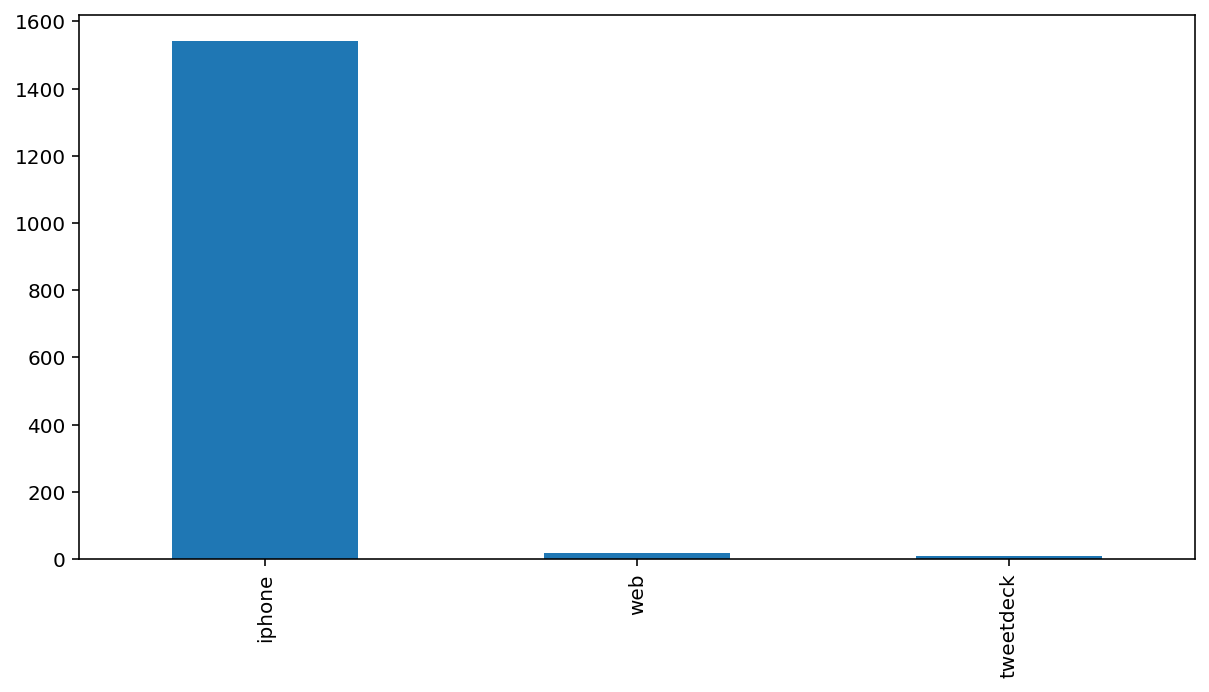

In [443]:
df_we_rate_dogs.source.value_counts().plot.bar(figsize=(10,5) )

- Iphone is the most source of tweet

#### Insight & visualisation
- What are the popular names of dogs given?

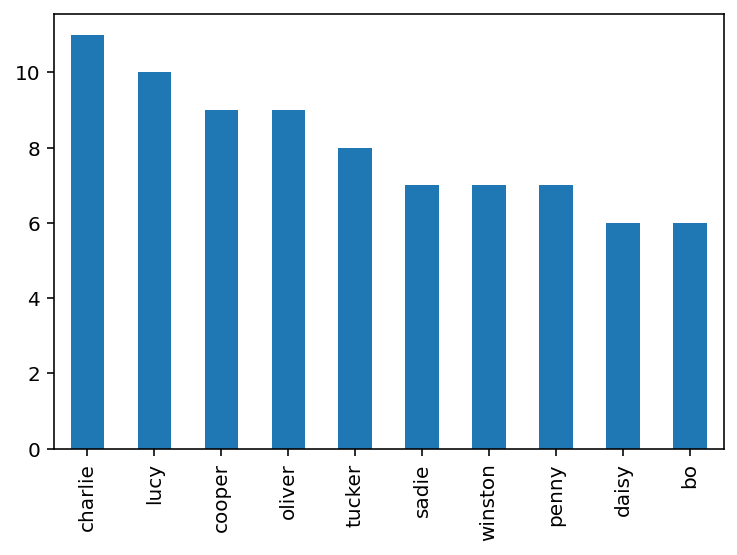

In [444]:
df_we_rate_dogs.name.value_counts()[0:10].plot(kind='bar');

- Charlie is the most popular dog name given in this dataset